In [20]:
import numpy as np
import os
import cv2 as cv
from matplotlib import pyplot as plt
import pickle

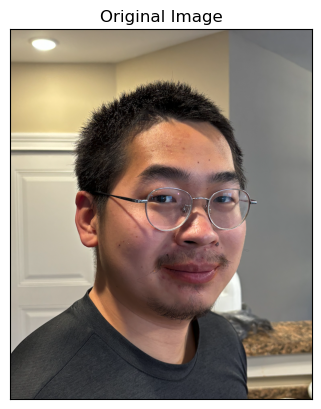

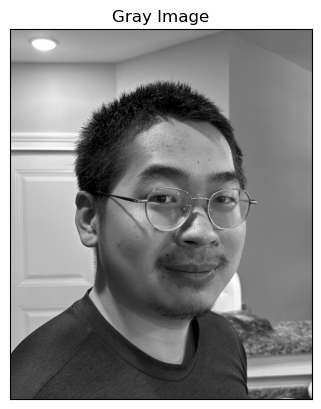

[[187 209 413 413]]
Faces found:  1
detected =  4
confidence =  91.46750092681793


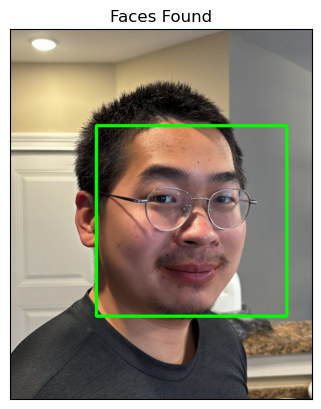

In [21]:
# Enter the paths for your image and cascade files here
imagePath = '7.jpg'
labelsPath = 'labels.pickle'

# Create the haar cascade (XML file that contains the data to detect faces)
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml') #Face Classifier

# Create the recognizer
recognizer = cv.face.LBPHFaceRecognizer_create()
# Import the training data for the recognizer
recognizer.read("trainer.yml")

# Import the labels created by the facesTrain program
labels = {}
with open("labels.pickle", 'rb') as pickleFile:
    original_labels = pickle.load(pickleFile)
    #invert the order:
    labels = {v:k for k, v in original_labels.items()}

# Read the image
image = cv.imread(imagePath)
image_RGB= cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.title("Original Image")
plt.imshow(image_RGB) # open the image as RGB
plt.xticks([]),plt.yticks([])
plt.show()

#Transform the image to Grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.title("Gray Image")
plt.imshow(gray, cmap='gray') # open the image as RGB
plt.xticks([]),plt.yticks([])
plt.show()

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.21, #1.25
    minNeighbors=4, #5
    minSize=(20, 20), #30, 30
    flags = cv.CASCADE_SCALE_IMAGE
)
print(faces)

#print "Found {0} faces!".format(len(faces))
print('Faces found: ', len(faces))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv.rectangle(image_RGB, (x, y), (x+w, y+h), (0, 255, 0), 5)
    roi_gray = gray[y:y+h, x:x+w]
    id_now, confidence = recognizer.predict(roi_gray)
    print("detected = ", labels[id_now])
    print("confidence = ", confidence)

plt.title("Faces Found")
plt.imshow(image_RGB) # open the image as RGB
plt.xticks([]),plt.yticks([])
plt.show()